In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 01:41:05 2023

@author: D. Garro-Cataño
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from scipy.signal import find_peaks

from scipy.interpolate import UnivariateSpline
def FWHM(x,Int):
    HalfMax=(np.max(Int)-Int[0])/2 #Half Maximum of the peak
    HalfMaxwithBackg=HalfMax+Int[0]
    print("Half Max =", HalfMaxwithBackg)
    spline = UnivariateSpline(x, Int-HalfMaxwithBackg, s=0)
    r1, r2 = spline.roots() # find the roots
    Width=r2-r1
    print("FWHM=", Width)
    return Width

from scipy.integrate import trapz
def SinglePeakAnaly(peak,x,y,startleft,endright):
        # substract the background, or the "floor" from the intensity of the spectrum; set 0 as the beginning of the peak

        # Define the range around each peak (adjust the range as needed)
        start_index = round(max(0, peak - startleft))
        end_index = round(min(len(x), peak + endright))
        #print(start_index,end_index,startleft,endright)
        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        # Plot the extracted region around the first peak
        plt.figure(peak)
        plt.plot(peakx,peaky,"-*", label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()

        """
        ####### let's now define the peak region with 3*sigma to the left and 3*sigma to the right #########
        a=FWHM(peakx,peaky)
        #FWHM=a
        # Define the range around each peak (adjust the range as needed)
        x=np.array([1,2,3])
        print(np.where(x == 2)[0][0])
        start_index = max(0, np.where(x == (x[peak] - 3*a/2))[0][0])
        end_index = min(len(x), np.where(x == (x[peak] + 3*a/2))[0][0])
        # Store the data for each peak in a dictionary (optional)
        #peak_data[peak] = {'x': x[start_index:end_index], 'y': y[start_index:end_index]}
        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        """
        # Plot the extracted region around the first peak
        plt.plot(peakx,peaky, label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()
        """

        ##### Calculate Area and Gain Factor #####
        PeakArea = trapz(peaky, x=peakx)
        return PeakArea


def Peakfinder(frecuencia, intensidad,h,name):
    frecuencia=np.array(frecuencia)
    intensidad=np.array(intensidad)
    # Encuentra picos en el espectro de intensidad
    picos, _ = find_peaks(intensidad, height=h,prominence=0.01)  # Ajusta el valor de "height" según tu espectro
    # picos is the peak INDEX

    # Grafica el espectro de intensidad y resalta los picos
    plt.figure(1,figsize=(10, 6))
    plt.plot(frecuencia, intensidad,label="{}".format(name))
    plt.plot(frecuencia[picos], intensidad[picos], 'ro')  # Picos en rojo
    plt.xlabel('Frecuencia')
    plt.ylabel('Intensidad')
    plt.title('Espectro de Intensidad con Picos')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Imprime las frecuencias de los picos
    frecuencias_picos = frecuencia[picos]
    #maxint=max(intensidad[picos])
    #ind=list(intensidad).index(maxint)
    print("Peaks of {}:".format(name), frecuencia[picos]) #frecuencia[picos]
    # to get eV: 1*10**7* 0.00012398/frecuencia[picos]
    # to get k: 1*10**7/frecuencia[picos]

    # Extract a region around each peak
    peaks=picos #peaks indexes #better in english
    x=frecuencia
    y=intensidad
    peak_data = {}
    ranges = 20*np.ones((len(peaks), 2))

    #### for Absorbance_Biop ####
    #ranges[0][0]=ranges[0][0]+9
    #ranges[0][1]=ranges[0][1]-9
    #ranges[1][0]=ranges[0][0]+1
    #ranges[1][1]=ranges[0][1]+13

    for peak,range in zip(peaks,ranges):
      PeakArea=SinglePeakAnaly(peak,x,y,range[0],range[1])
      print("peak", x[peak], "nm Area:",PeakArea)


#Absorbance

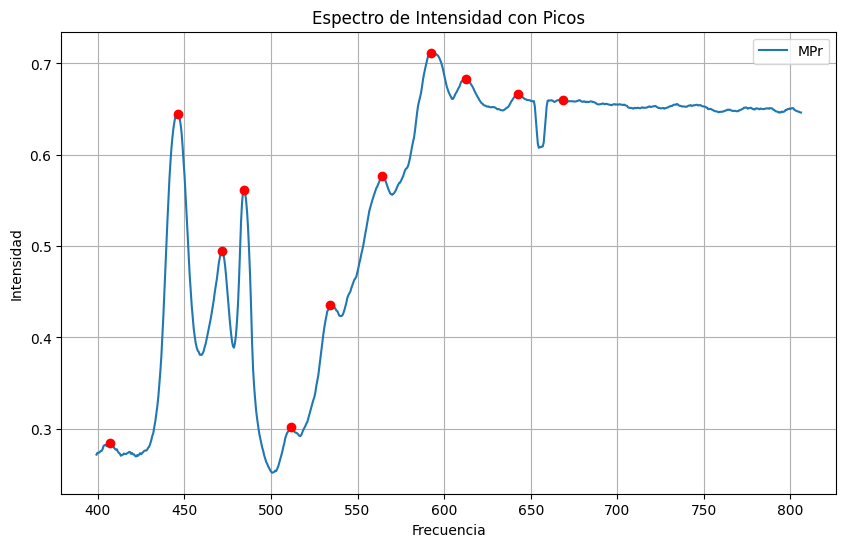

Peaks of MPr: [406.8728942871094 446.04046630859375 471.6719055175781 484.460205078125
 511.718505859375 534.27197265625 564.2496337890625 592.398193359375
 612.4442138671875 642.7025146484375 668.8681640625]
0 33 20.0 20.0


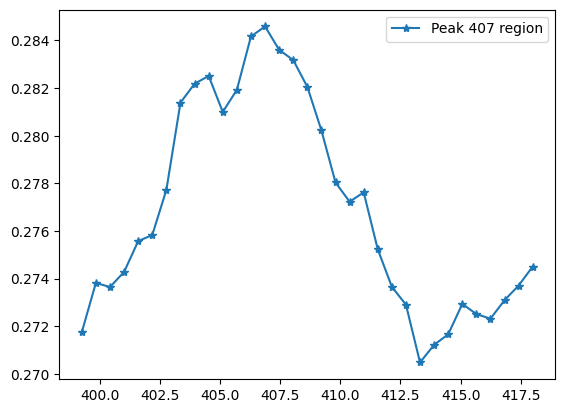

60 100 20.0 20.0


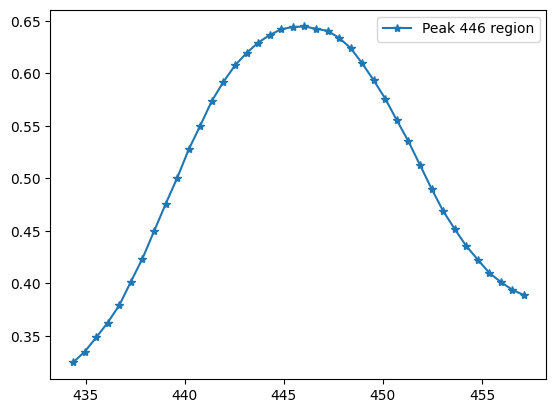

104 144 20.0 20.0


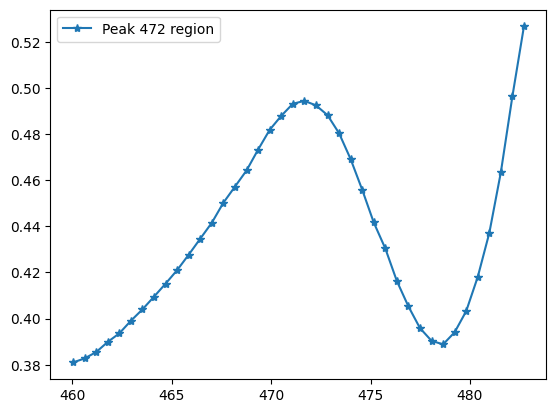

126 166 20.0 20.0


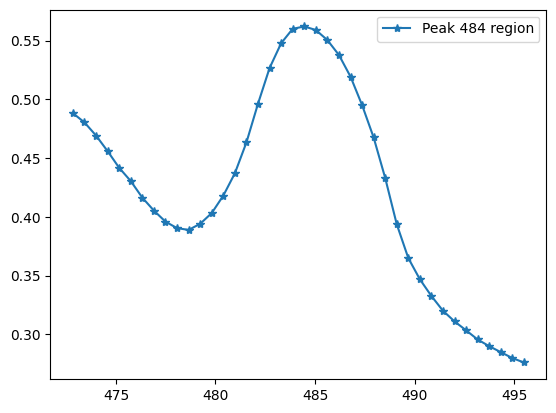

173 213 20.0 20.0


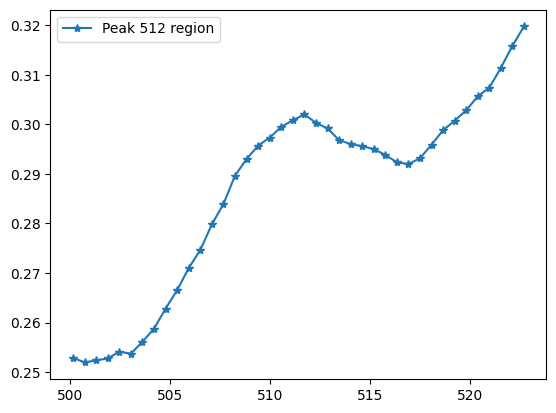

212 252 20.0 20.0


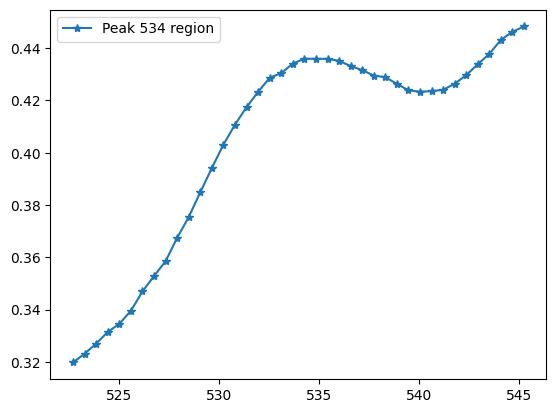

264 304 20.0 20.0


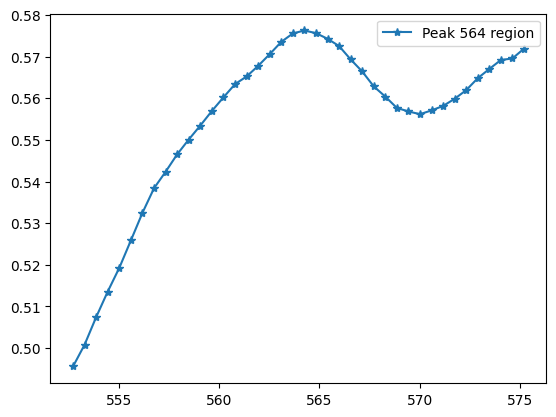

313 353 20.0 20.0


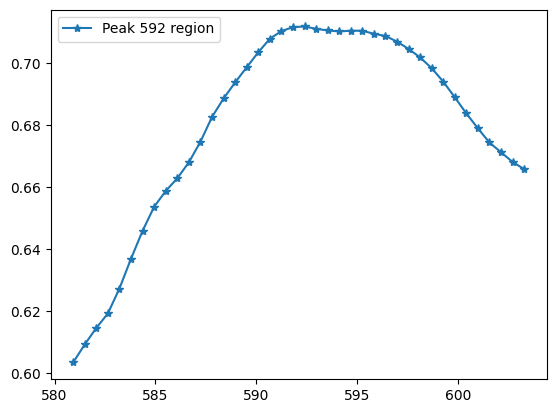

348 388 20.0 20.0


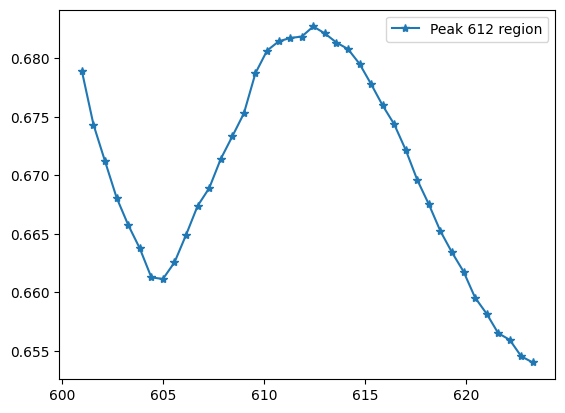

401 441 20.0 20.0


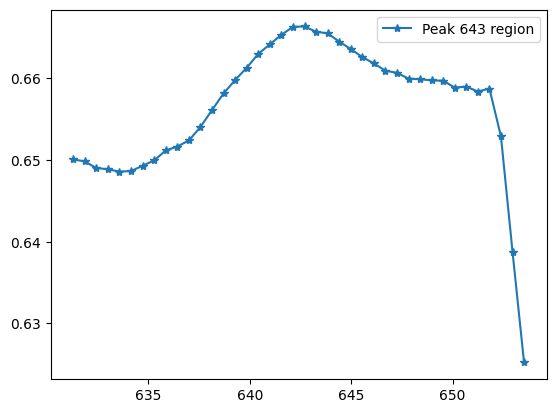

447 487 20.0 20.0


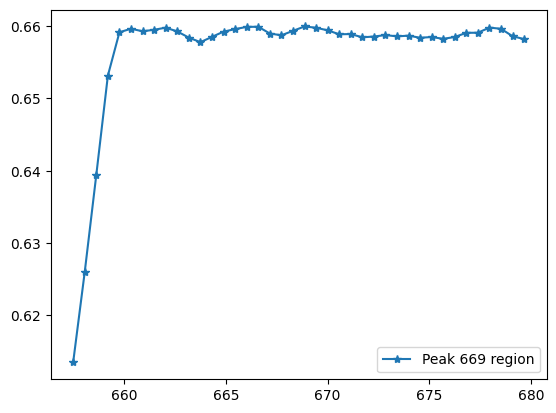

'\n#Peakfinder(wl, -np.log10(M_Pr0),-0.5,"AgCurved_V")\n#Peakfinder(wl, -np.log10(M_Pr1),-0.5,"AgCurved_V")\n#Peakfinder(wl, -np.log10(M_Pr2),-0.5,"AgCurved_V")\nPeakfinder(wl, -np.log10(M_Pr_Tio2),-1.6,"MPrTiO2")\nPeakfinder(wl, -np.log10(M_Pr_Tio2_R),-1.6,"MPrTiO2R")\nPeakfinder(wl, -np.log10(Tio2),-1.6,"MTiO2")\n#Peakfinder(wl, -np.log10(Tio2_R),-0.5,"AgCurved_V")\n'

In [14]:
df = pd.read_excel('TransmPrTiO2.xlsx')

#print(df)

#for i in range(len(df.columns)):
#    coli=df.iloc[5:,i]


##### Acording to file order, name the columns
startrow=388#388#219
endrow=1100#1457

wl=np.array(df.iloc[startrow:endrow,0])

Ag=np.array(df.iloc[startrow:endrow,1])
Ag2=np.array(df.iloc[startrow:endrow,2])

Ag45=np.array(df.iloc[startrow:endrow,3] )
Ag45_H=np.array(df.iloc[startrow:endrow,4] )
Ag45_V=np.array(df.iloc[startrow:endrow,5] )


AgCurved=np.array(df.iloc[startrow:endrow,6] )
AgCurved_H=np.array(df.iloc[startrow:endrow,7] )
AgCurved_V=np.array(df.iloc[startrow:endrow,8] )

Ag_H=np.array(df.iloc[startrow:,9] )
Ag_HV_H=np.array(df.iloc[startrow:,10] )
Ag_V=np.array(df.iloc[startrow:,11] )



### Rare Earths ####
M=np.array(df.iloc[startrow:endrow,12] )
M_Pr0=np.array(df.iloc[startrow:endrow,13])
M_Pr2=np.array(df.iloc[startrow:endrow,14] )
M_Pr1=np.array(df.iloc[startrow:endrow,15]) #repeticion
M_Pr=np.array(df.iloc[startrow:endrow,20]) #repeticion

M_Pr_Tio2=np.array(df.iloc[startrow:endrow,16]) #repeticion
M_Pr_Tio2_R=np.array(df.iloc[startrow:endrow,17] )#repeticion
Tio2=np.array(df.iloc[startrow:endrow,18]) #repeticion
Tio2_R=np.array(df.iloc[startrow:endrow,19]) #repeticion

#Peakfinder(wl, -np.log10(Ag),-1.5,"Ag")
#Peakfinder(wl, -np.log10(AgCurved),-0.5,"AgCurved")
#Peakfinder(wl, -np.log10(AgCurved_H),-0.5,"AgCurved_H")
#Peakfinder(wl, -np.log10(AgCurved_V),-0.5,"AgCurved_V")

#print(M_Pr-M)
#Peakfinder(wl, -np.log10(M),-0.5,"M")
Peakfinder(wl, -np.log10(abs(M_Pr))+np.log10(M),-1.6,"MPr")
"""
#Peakfinder(wl, -np.log10(M_Pr0),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr1),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr2),-0.5,"AgCurved_V")
Peakfinder(wl, -np.log10(M_Pr_Tio2),-1.6,"MPrTiO2")
Peakfinder(wl, -np.log10(M_Pr_Tio2_R),-1.6,"MPrTiO2R")
Peakfinder(wl, -np.log10(Tio2),-1.6,"MTiO2")
#Peakfinder(wl, -np.log10(Tio2_R),-0.5,"AgCurved_V")
"""


In [15]:
df2 = pd.read_excel('EmisPr05ti01sni8.xls')
df3 = pd.read_excel('EmisPr05ti005 vis.xls')

df2=df2.T.drop_duplicates().T
df3=df3.T.drop_duplicates().T
cols=['wl', "Pr", "PrNp"]
df2.columns=cols
df3.columns=cols

df2.head()

,wl,Pr,PrNp
0,779.930188,169067.0,169353.0
1,780.210678,169132.0,169486.0
2,780.491159,169176.0,169578.0
3,780.771632,169983.0,169617.0
4,781.052096,169289.0,169604.0


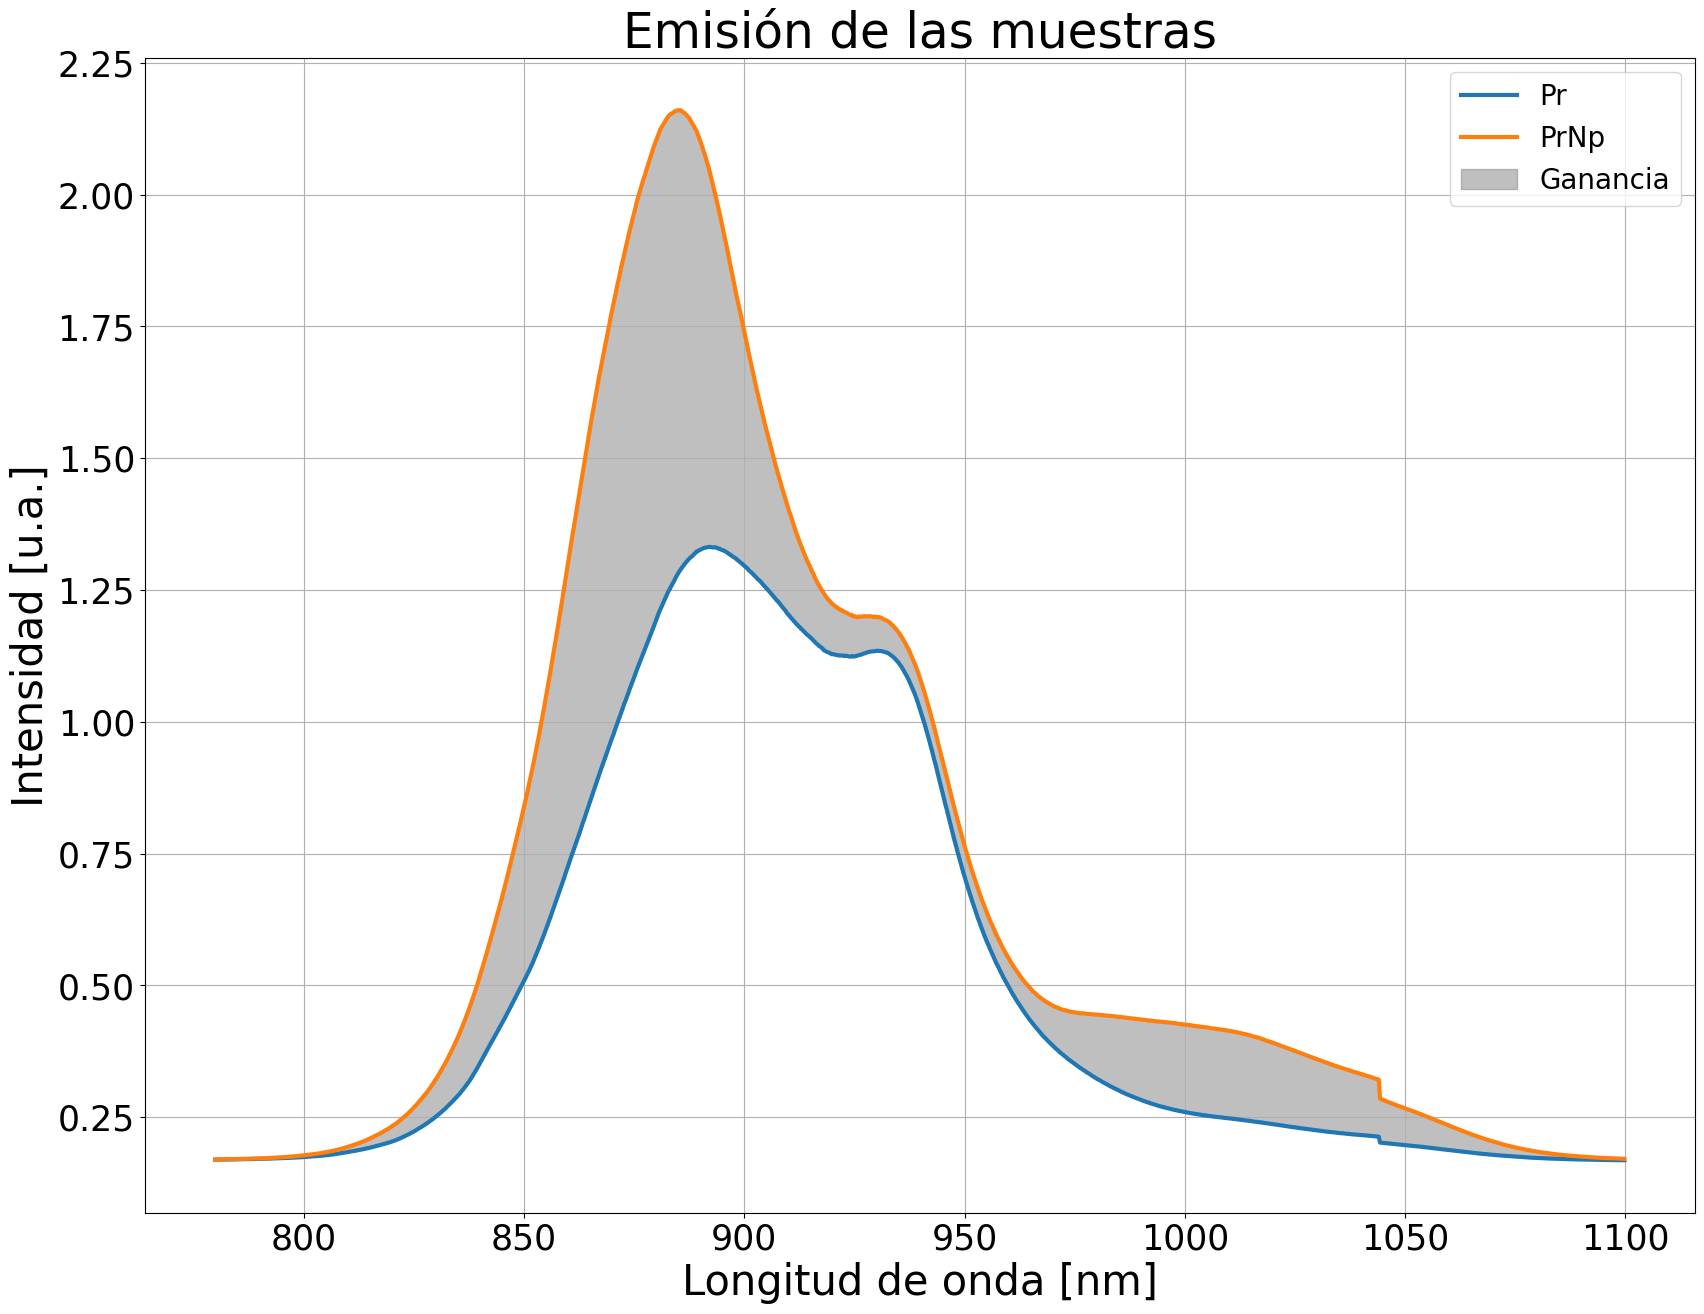

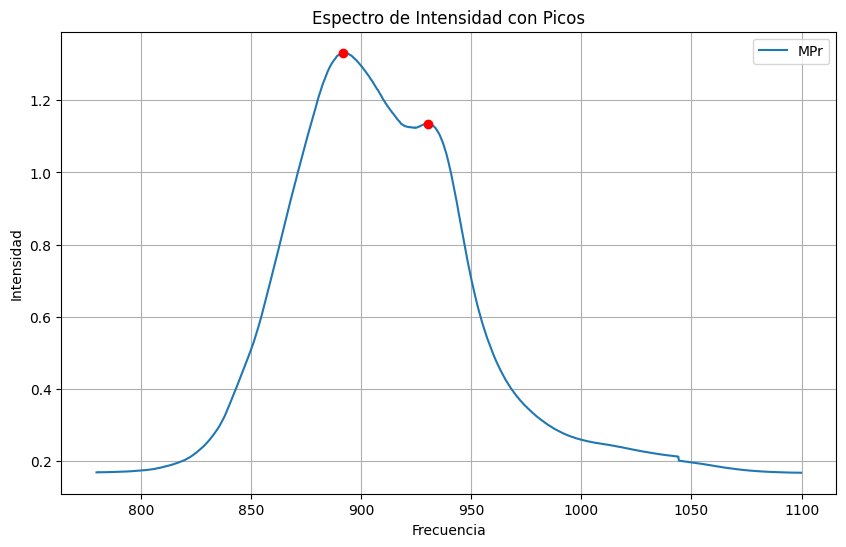

Peaks of MPr: [891.92665072 930.25249165]


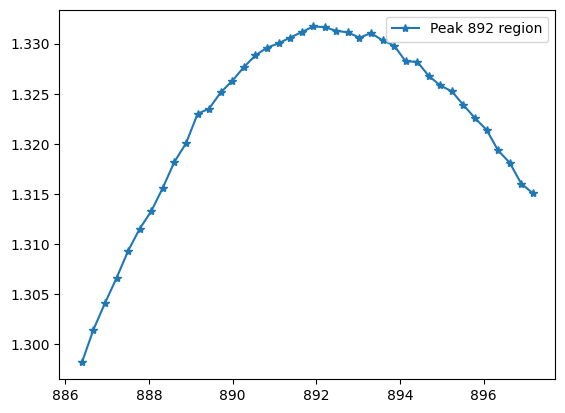

peak 891.926650721422 nm Area: 14.264913802283942


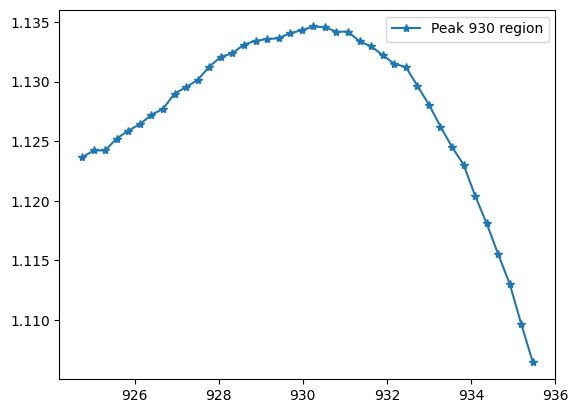

peak 930.252491653809 nm Area: 12.093176513881666


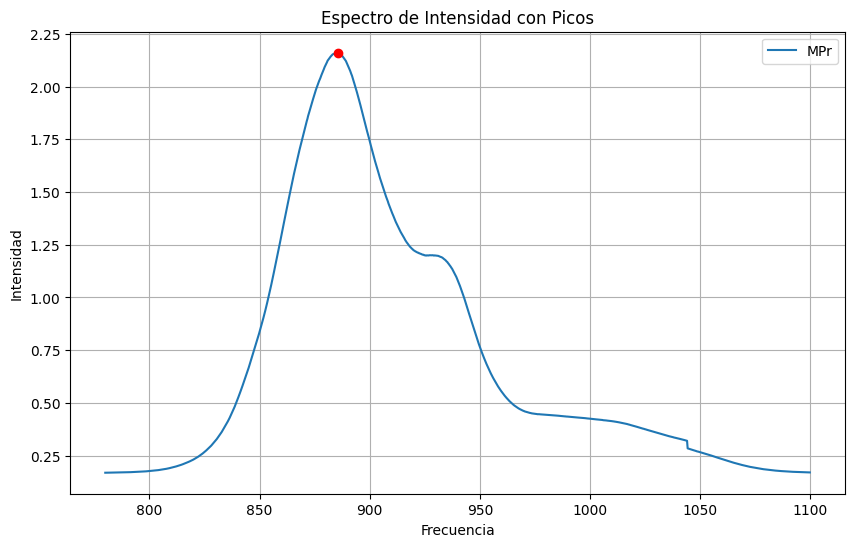

Peaks of MPr: [885.56363374]


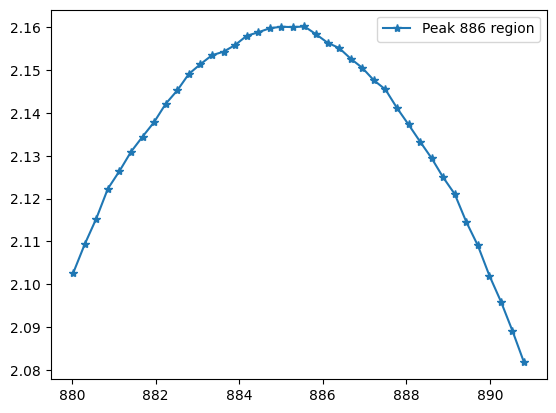

peak 885.563633743376 nm Area: 23.067690498946376


In [22]:
#df2=pd.read_csv("data/emision1.csv")
#df3=pd.read_csv("data/emision2.csv")

df2 = pd.read_excel('EmisPr05ti01sni8.xls')
df3 = pd.read_excel('EmisPr05ti005 vis.xls')

df2=df2.T.drop_duplicates().T
df3=df3.T.drop_duplicates().T
cols=['wl', "Pr", "PrNp"]
df2.columns=cols
df3.columns=cols

#df2.describe()
df2['Pr']=df2['Pr']*1e-6
df2['PrNp']=df2['PrNp']*1e-6

df3['Pr']=df3['Pr']*1e-6
df3['PrNp']=df3['PrNp']*1e-6

fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df2.iloc[:,0], df2.iloc[:,i], lw=3, label=df2.columns[i])

plt.fill_between(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], where=(df2.iloc[:,2]> df2.iloc[:,1]), interpolate=True, alpha=0.5, color='gray', label='Ganancia')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
plt.show()

fig.savefig("emision1.svg", dpi=300, format="svg")
#print(np.array(df2.wl))
#print(wl)
Peakfinder(np.array(df2.wl), np.array(df2.Pr),-1.6,"MPr")
Peakfinder(np.array(df2.wl), np.array(df2.PrNp),-1.6,"MPr")

In [ ]:
####### Area y factor de Ganancia ##########
import numpy as np
from scipy.integrate import trapz

# Supongamos que tienes tus datos en dos listas x_values y y_values

area1 = trapz(df2['Pr'], x=df2['wl'])
area2 = trapz(df2['PrNp'], x=df2['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

Área bajo la curva: 162.8663312842209
Área bajo la curva: 221.8615779871976
Factor de ganancia: 1.3622310777052076


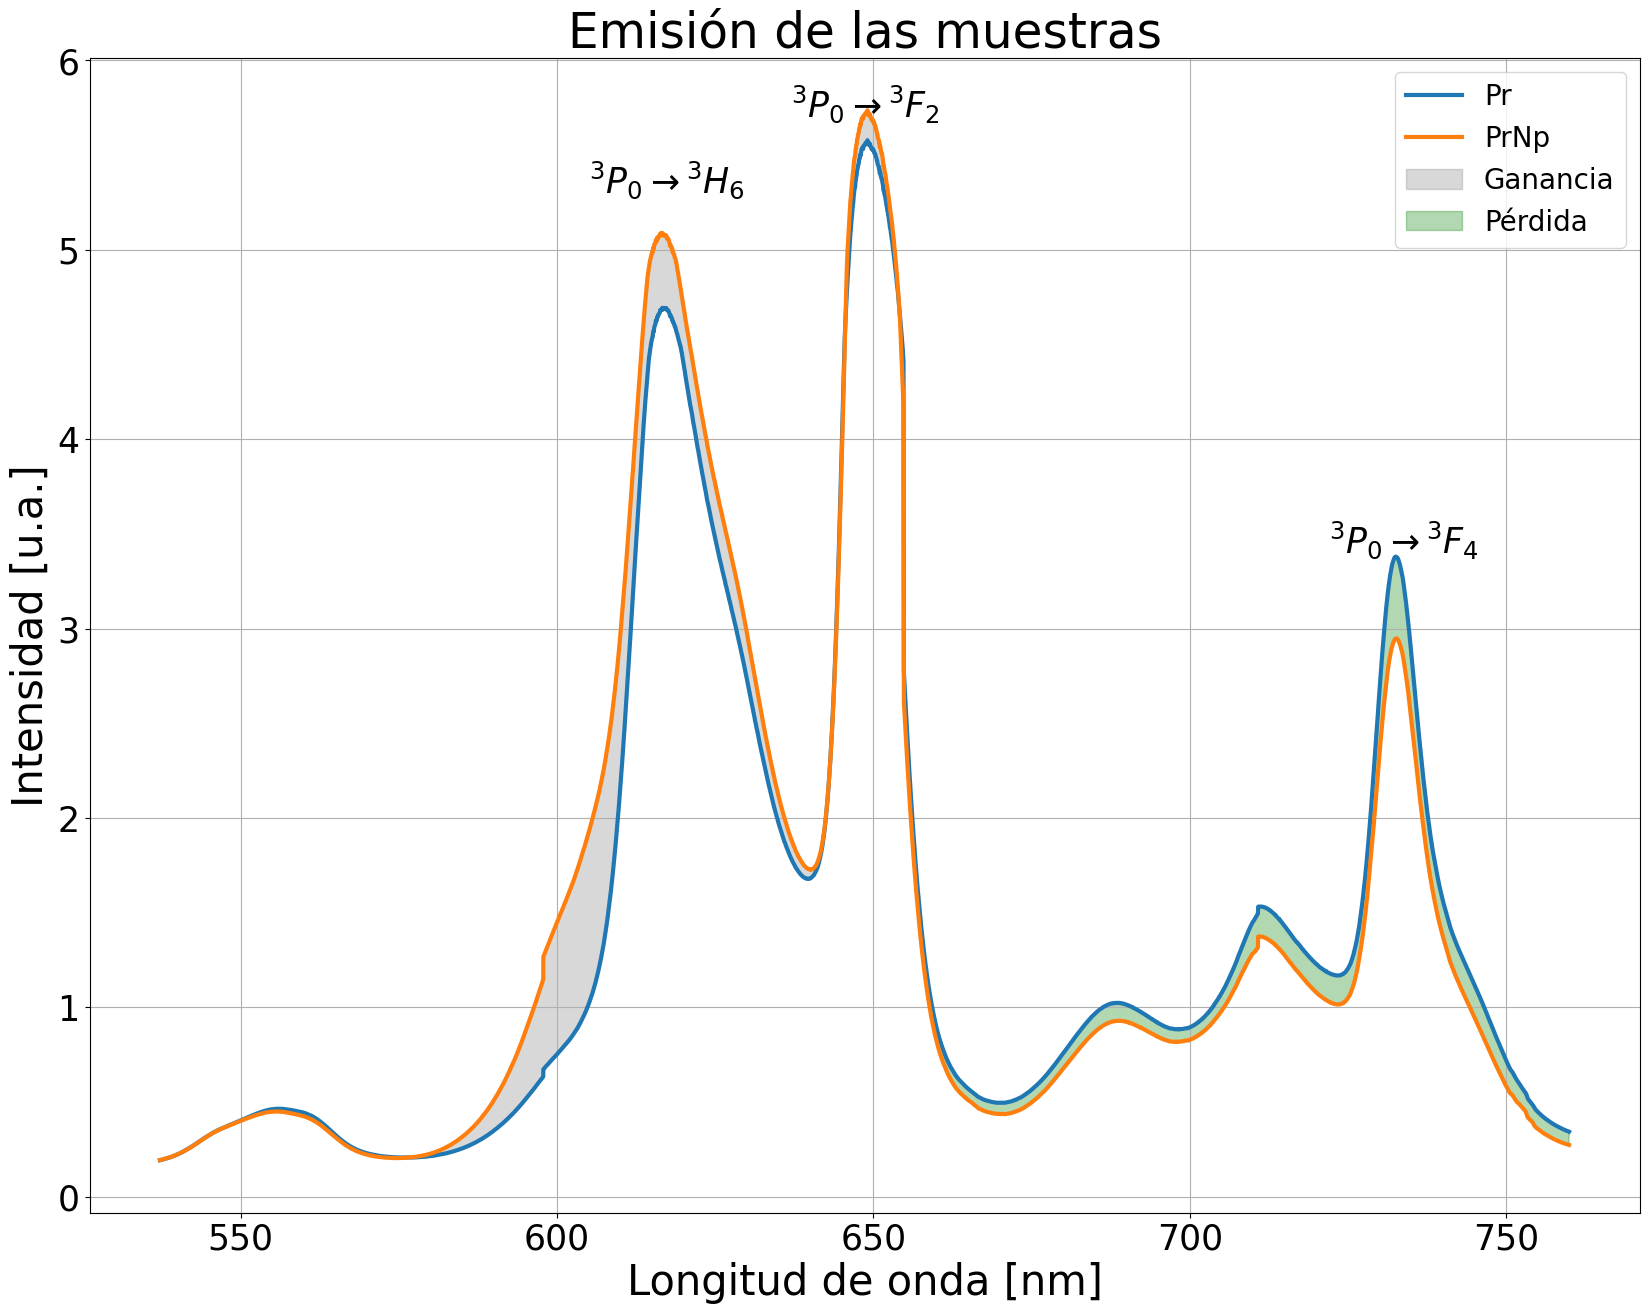

Área bajo la curva: 312.1668267066874
Área bajo la curva: 321.517893203185
Factor de ganancia: 1.0299553498209593


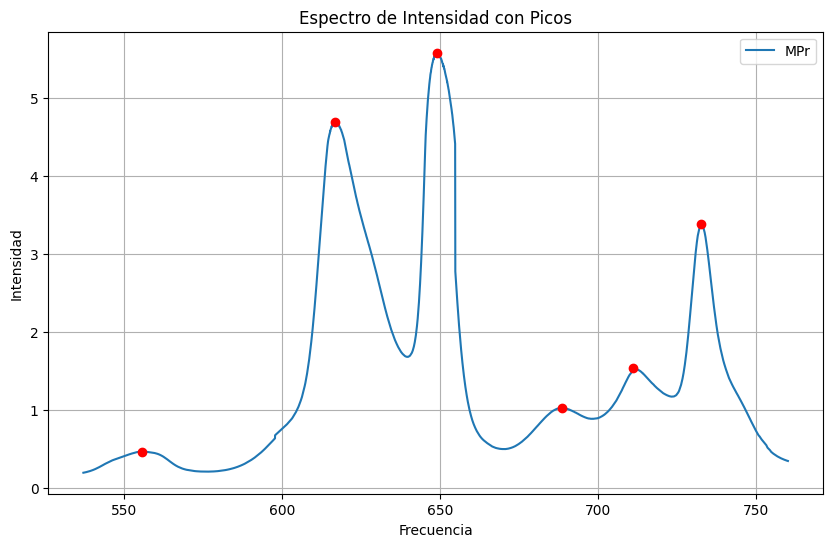

Peaks of MPr: [555.89369138 616.66028703 649.06342743 688.58759827 710.99061265
 732.57034017]


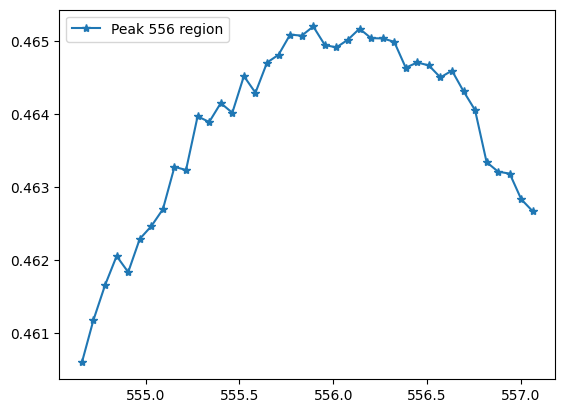

peak 555.893691383031 nm Area: 1.1148941760552875


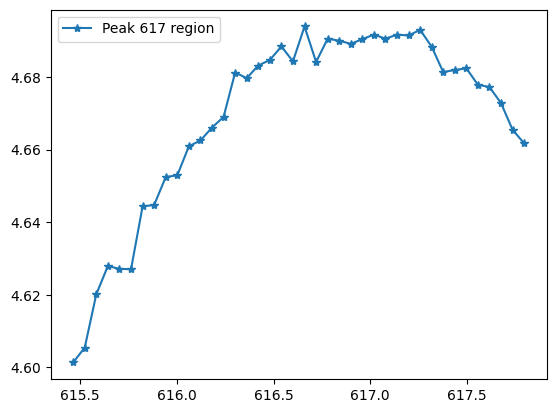

peak 616.660287033209 nm Area: 10.876861022880902


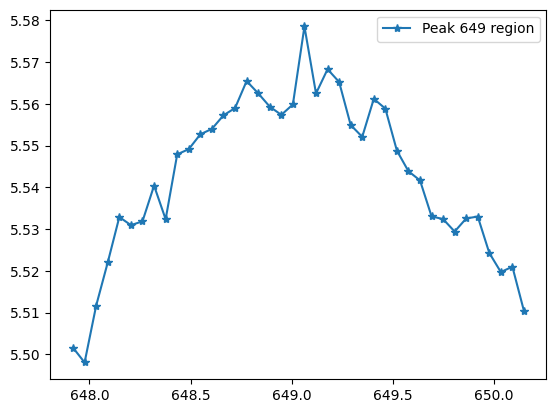

peak 649.063427428075 nm Area: 12.363778047122896


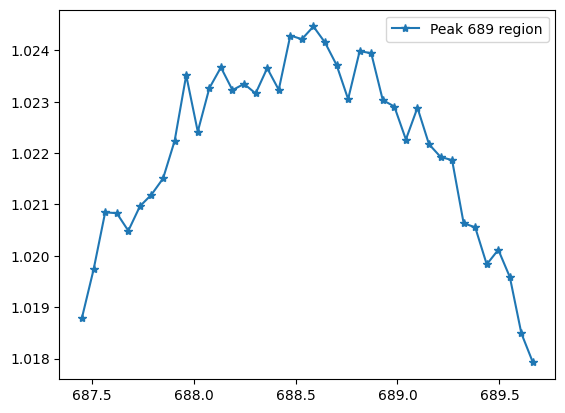

peak 688.587598270723 nm Area: 2.261288263042161


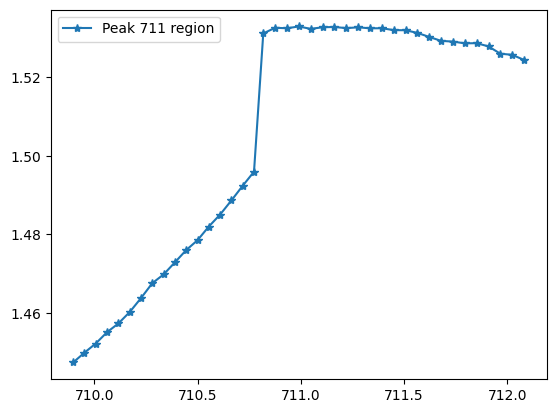

peak 710.990612647265 nm Area: 3.2901925212946783


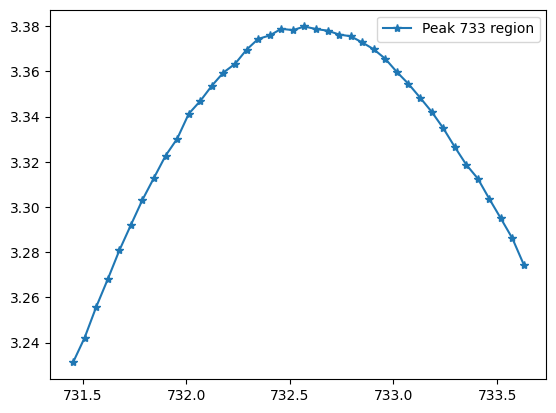

peak 732.570340169034 nm Area: 7.256362276487211


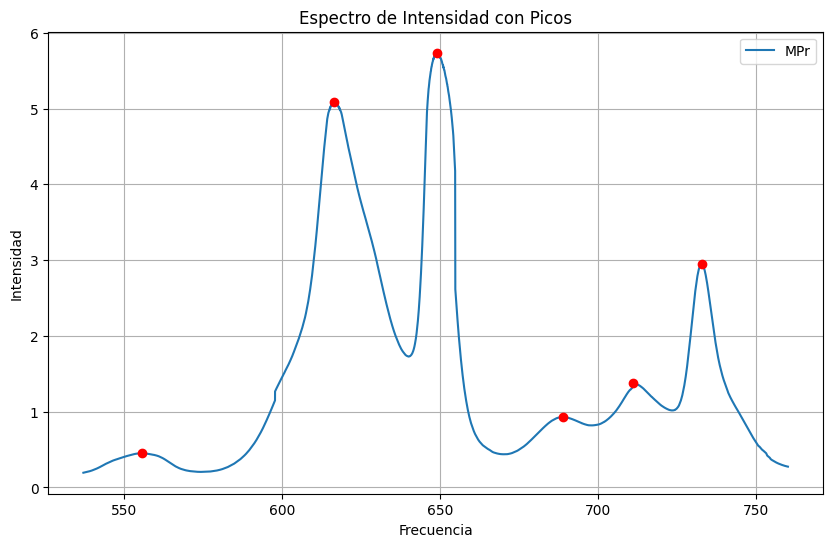

Peaks of MPr: [555.83206474 616.54083424 649.06342743 688.87115452 710.99061265
 732.68189421]


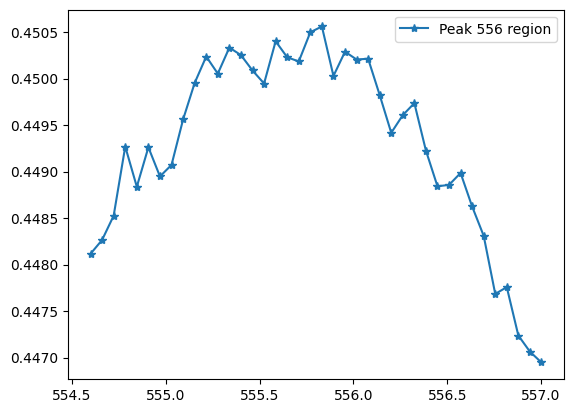

peak 555.832064736234 nm Area: 1.080007689633412


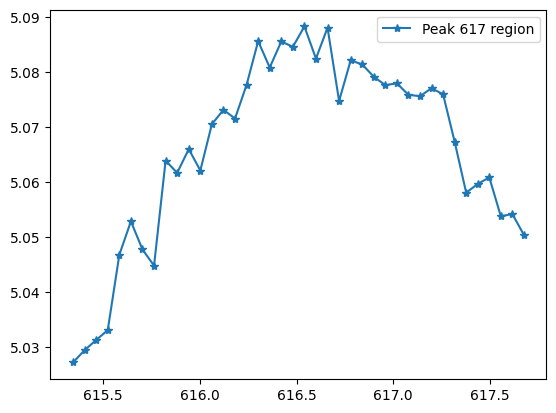

peak 616.540834237277 nm Area: 11.803042684192503


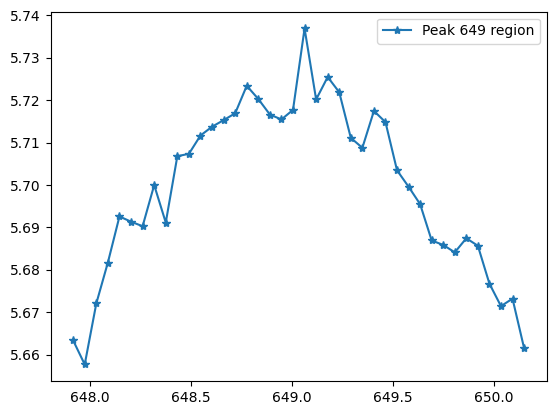

peak 649.063427428075 nm Area: 12.713650726083955


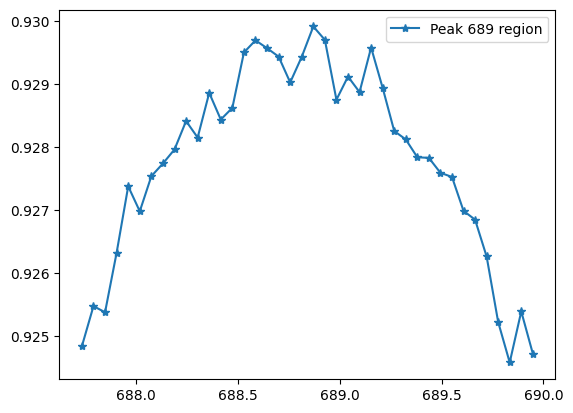

peak 688.8711545155 nm Area: 2.0518117313491127


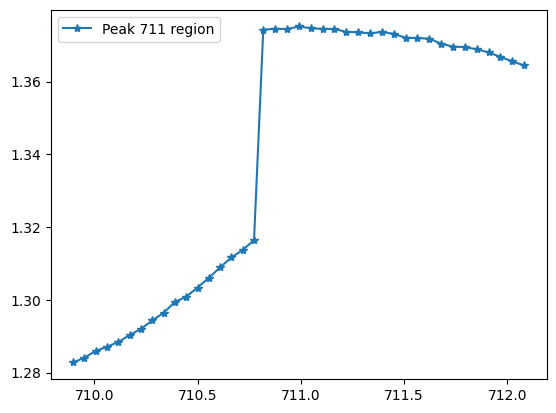

peak 710.990612647265 nm Area: 2.930763318203945


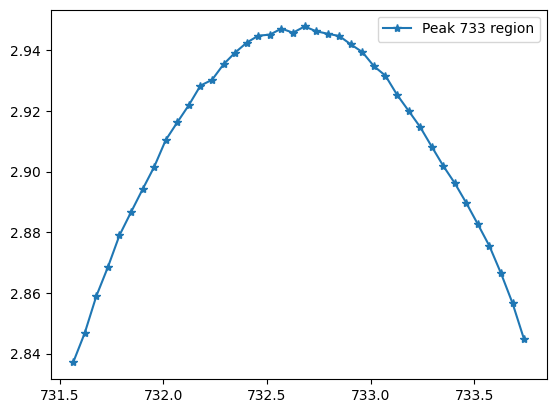

peak 732.681894209089 nm Area: 6.333418941246318


In [23]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df3.iloc[:,0], df3.iloc[:,i], lw=3, label=df3.columns[i])

plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]> df3.iloc[:,1]), interpolate=True, alpha=0.3, color='gray', label='Ganancia')
plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]< df3.iloc[:,1]), interpolate=True, alpha=0.3, color='green', label='Pérdida')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
ax.text(605, 5.3, r'$^{3}P_0\rightarrow ^{3}H_6$', fontsize=25, color='k')
ax.text(637, 5.7, r'$^{3}P_0\rightarrow ^{3}F_2$', fontsize=25, color='k')
ax.text(722, 3.4, r'$^{3}P_0\rightarrow ^{3}F_4$', fontsize=25, color='k')
plt.show()

fig.savefig("emision2.svg", dpi=300, format="svg")

##### Area y factor de ganancia ######
area1 = trapz(df3['Pr'], x=df3['wl'])
area2 = trapz(df3['PrNp'], x=df3['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

Peakfinder(np.array(df3.wl), np.array(df3.Pr),-1.6,"MPr")
Peakfinder(np.array(df3.wl), np.array(df3.PrNp),-1.6,"MPr")